# Librerías

In [1]:
import pandas as pd
import numpy as np
#librerias

# Data Sets

Mortalidad 2017

In [2]:
mortalidad = pd.read_csv('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/defunciones_base_datos_2017_csv/conjunto_de_datos/conjunto_de_datos_defunciones_generales_2017.CSV')


Catalogo de Edad

In [3]:
dataedad = pd.read_excel('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/edad_numero.xlsx')

In [4]:
# Eliminar los espacios en blanco de la columna 'lista_mex'
mortalidad['lista_mex'] = mortalidad['lista_mex'].str.strip()

# Filtrar el DataFrame donde la columna 'lista_mex' es igual a 'E54'
mortalidad_e54 = mortalidad[mortalidad['lista_mex'] == '54']
#'loc_resid', , 'edad'
# Agrupar por 'ent_resid', 'mun_resid', 'loc_resid', 'sexo', 'edad' y contar los registros
grupo_mortalidad = mortalidad_e54.groupby(['ent_resid', 'mun_resid', 'sexo']).size().reset_index(name='suicidios')

Datos de Persona

In [5]:
data1 = pd.read_csv('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/Condiciones en el Hogar 2017/persona.csv')

/var/folders/q5/pdmv7wnx6hsgdlyqhmnkwgyc0000gn/T/ipykernel_56123/3762290273.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/Condiciones en el Hogar 2017/persona.csv')


Datos Hogar

In [6]:
data2 = pd.read_csv('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/Condiciones en el Hogar 2017/hogar.csv')

Datos de Vivienda

In [8]:
data3 = pd.read_csv('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/Condiciones en el Hogar 2017/vivienda.csv')

/var/folders/q5/pdmv7wnx6hsgdlyqhmnkwgyc0000gn/T/ipykernel_56123/231641073.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/Condiciones en el Hogar 2017/vivienda.csv')


In [9]:
# Crear las nuevas columnas 'entidad', 'municipio' y 'localidad'
data3['ubica_geo'] = data3['ubica_geo'].astype(str)
data3['entidad'] = data3['ubica_geo'].str.slice(0, 2)
data3['municipio'] = data3['ubica_geo'].str.slice(2, 5)

In [10]:
# Lista de columnas que deseas mantener
columnas_a_mantener = ['entidad', 'municipio', 'folioviv']

# Crear un nuevo DataFrame con solo las columnas deseadas
data3 = data3[columnas_a_mantener]

In [11]:
merged_data = pd.merge(data1, data2, on=['foliohog', 'folioviv'])
merged_data.head()
data = pd.merge(merged_data, data3, on=['folioviv'])
data.head()

,folioviv,foliohog,id_pobla,edad,nacio_dia,nacio_mes,sexo,parentesco,asiste_esc,tipo_esc,...,cuid_perso,lavandero,chofer,cocinero,jardinero,tot_integ,tot_hom,tot_muj,entidad,municipio
0,100008010,1,1,79,16,12,1,1,2,,...,,,,,,4,2,2,10,010
1,100008010,1,2,34,30,7,1,4,1,1,...,,,,,,4,2,2,10,010
2,100008010,1,3,31,8,9,2,8,2,,...,,,,,,4,2,2,10,010
3,100008010,1,4,3,3,9,2,8,2,,...,,,,,,4,2,2,10,010
4,100008034,1,1,42,20,5,1,1,2,,...,2,2,2,2,2,5,4,1,10,010


# Columnas Numéricas y/o No Numéricas

In [12]:
# Hacer una copia del DataFrame original
struct_data = data.copy()
# Seleccionar las columnas numéricas
numeric_columns = list(struct_data.select_dtypes(include=[np.number]).columns)
# Seleccionar las columnas no numéricas
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

# Limpieza de Datos

Limpieza Mortalidad

In [13]:
non_numeric_columns2 = list(grupo_mortalidad.select_dtypes(exclude=[np.number]).columns)

# Definir columnas a procesar
columns_to_process = non_numeric_columns2#['nacio_dia', 'nacio_mes', 'asiste_esc', 'tipo_esc', 'turno_esc', 'tiene_beca']

# Reemplazar caracteres no válidos y valores vacíos
for col in columns_to_process:
    grupo_mortalidad[col] = grupo_mortalidad[col].replace({'&': np.nan, ' ': np.nan})
    grupo_mortalidad[col] = pd.to_numeric(grupo_mortalidad[col], errors='coerce')
for col in columns_to_process:
    grupo_mortalidad[col].fillna(grupo_mortalidad[col].mean(), inplace=True)
# Reemplazar `NaN` con 0
grupo_mortalidad = grupo_mortalidad.fillna(0) 

Limpieza Data

In [14]:
# Definir columnas a procesar
columns_to_process = non_numeric_columns#['nacio_dia', 'nacio_mes', 'asiste_esc', 'tipo_esc', 'turno_esc', 'tiene_beca']

# Reemplazar caracteres no válidos y valores vacíos
for col in columns_to_process:
    struct_data[col] = struct_data[col].replace({'&': np.nan, ' ': np.nan})
    struct_data[col] = pd.to_numeric(data[col], errors='coerce')
for col in columns_to_process:
    struct_data[col].fillna(struct_data[col].mean(), inplace=True)
# Reemplazar `NaN` con 0
struct_data = struct_data.fillna(0)  


Renombrar Columnas

In [15]:
# Renombrar las columnas en 'data' para que coincidan con las de 'grupo_mortalidad'
struct_data = struct_data.rename(columns={
    'entidad': 'ent_resid',
    'municipio': 'mun_resid'
})
struct_data['ent_resid'] = struct_data['ent_resid'].astype(int)
struct_data['mun_resid'] = struct_data['mun_resid'].astype(int)
struct_data['sexo'] = struct_data['sexo'].astype(int)
struct_data['edad'] = struct_data['edad'].astype(int)

grupo_mortalidad['ent_resid'] = grupo_mortalidad['ent_resid'].astype(int)
grupo_mortalidad['mun_resid'] = grupo_mortalidad['mun_resid'].astype(int)
grupo_mortalidad['sexo'] = grupo_mortalidad['sexo'].astype(int)

Merge Mortalidad y Data y seleccion de Datos Numericos para Verificar

In [16]:
# Realizar la unión de los DataFrames
struct_data = pd.merge(struct_data, grupo_mortalidad, on=['ent_resid', 'mun_resid', 'sexo'], how='left')

# Seleccionar las columnas numéricas
numeric_columns = list(struct_data.select_dtypes(include=[np.number]).columns)

# Imprimir las columnas numéricas
print("Numeric columns:", numeric_columns)

Numeric columns: ['folioviv', 'foliohog', 'id_pobla', 'edad', 'nacio_dia', 'nacio_mes', 'sexo', 'parentesco', 'asiste_esc', 'tipo_esc', 'turno_esc', 'tiene_beca', 'otorg_beca', 'forma_beca', 'no_asiste', 'grado_inst', 'nivel_inst', 'residencia', 'alfabetism', 'edo_conyug', 'trabajo_sp', 'motivo_aus', 'act_buscot', 'act_pensio', 'act_quehac', 'act_estudi', 'act_discap', 'act_otra', 'num_trabaj', 'subor', 'indep', 'personal', 'pago', 'contrato', 'lentes', 'dif_ver', 'a_auditivo', 'dif_oir', 'sin_ruido', 'con_ruido', 'dif_camina', 'usa_aparat', 'ap_caminar', 'cam_100mts', 'cam_500mts', 'sube_12esc', 'dif_record', 'frec_nerv', 'med_nerv', 'inte_nerv', 'frec_depre', 'med_depre', 'inte_depre', 'frec_dolor', 'inte_dolor', 'frec_cansa', 'tiem_cansa', 'inte_cansa', 'huespedes', 'huesp_come', 'trabaja_do', 'cuid_perso', 'lavandero', 'chofer', 'cocinero', 'jardinero', 'tot_integ', 'tot_hom', 'tot_muj', 'ent_resid', 'mun_resid', 'suicidios']


In [17]:
struct_data = struct_data.fillna(0)  # Reemplazar `NaN` con 0
# Crear un DataFrame de ejemplo
df = pd.DataFrame(struct_data)

# Obtener una lista de columnas que contienen NaN
columnas_con_nan = df.columns[df.isna().any()].tolist()

print("Columnas que contienen NaN:")
print(columnas_con_nan)

Columnas que contienen NaN:
[]


# Crear la columna 'suicidio' 


In [18]:
# Crear la columna 'suicidio' y 'depresion' usando operaciones vectorizadas
struct_data['suicidio'] = (struct_data['suicidios'] >= 1).astype(int)
struct_data['depresion'] = struct_data['frec_depre'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)
# Eliminar las columnas 'suicidios' y 'frec_depre' del DataFrame
struct_data.drop(columns=['suicidios'], inplace=True)

In [19]:
# Contar y mostrar el número de registros para cada valor en la columna 'depresion'
depresion_counts = struct_data['depresion'].value_counts()
print("Número de registros con depresion=1:", depresion_counts.get(1, 0))
print("Número de registros con depresion=0:", depresion_counts.get(0, 0))


Número de registros con depresion=1: 55845
Número de registros con depresion=0: 152295


# Variable y

In [20]:
y = struct_data.suicidio

# Variables X

In [21]:
X = struct_data.drop(columns='suicidio')

# Balanceo de Datos

In [22]:
print("Antes del balanceo:")
print('Sin Suicidios', np.sum(y == 0))
print('Suicidios', np.sum(y == 1))

Antes del balanceo:
Sin Suicidios 97376
Suicidios 110764


In [23]:
if X.isnull().values.any():
    raise ValueError("X contiene valores nulos")
if pd.isnull(y).values.any():
    raise ValueError("y contiene valores nulos")

In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='all', random_state=42) #sampling_strategy='auto'#
X_balanced, y_balanced = smote.fit_resample(X, y)

In [25]:
# Contar el número de muestras en cada clase después del balanceo
print("Después del balanceo:")
print('Sin Suicidios', np.sum(y_balanced == 0))
print('Suicidios', np.sum(y_balanced == 1))


Después del balanceo:
Sin Suicidios 110764
Suicidios 110764


conteo balanceado con depresion 

In [29]:
# Filtrar los conteos específicos
conteo_depresion_suicidio = struct_data[(struct_data['depresion'] == 1) & (struct_data['suicidio'] == 1)].shape[0]
conteo_depresion_no_suicidio = struct_data[(struct_data['depresion'] == 1) & (struct_data['suicidio'] == 0)].shape[0]
conteo_no_depresion_suicidio = struct_data[(struct_data['depresion'] == 0) & (struct_data['suicidio'] == 1)].shape[0]
conteo_no_depresion_no_suicidio = struct_data[(struct_data['depresion'] == 0) & (struct_data['suicidio'] == 0)].shape[0]

# Imprimir los resultados
print("Número de registros con depresion=1 y suicidio=1:", conteo_depresion_suicidio)
print("Número de registros con depresion=1 y suicidio=0:", conteo_depresion_no_suicidio)
print("Número de registros con depresion=0 y suicidio=1:", conteo_no_depresion_suicidio)
print("Número de registros con depresion=0 y suicidio=0:", conteo_no_depresion_no_suicidio)


Número de registros con depresion=1 y suicidio=1: 28087
Número de registros con depresion=1 y suicidio=0: 27758
Número de registros con depresion=0 y suicidio=1: 82677
Número de registros con depresion=0 y suicidio=0: 69618


In [30]:
# Filtrar los conteos específicos
conteo_depresion_1sexo = struct_data[(struct_data['depresion'] == 1) & (struct_data['sexo'] == 1)].shape[0]
conteo_depresion_2_sexo = struct_data[(struct_data['depresion'] == 1) & (struct_data['sexo'] == 2)].shape[0]
conteo_no_depresion_1sexo = struct_data[(struct_data['depresion'] == 0) & (struct_data['sexo'] == 1)].shape[0]
conteo_no_depresion_2_suicidio = struct_data[(struct_data['depresion'] == 0) & (struct_data['sexo'] == 2)].shape[0]

# Imprimir los resultados
print("Número de registros con depresion=1 y sexo=1:", conteo_depresion_1sexo)
print("Número de registros con depresion=1 y sexo=2:", conteo_depresion_2_sexo)
print("Número de registros con depresion=0 y sexo=1:", conteo_no_depresion_1sexo)
print("Número de registros con depresion=0 y sexo=2", conteo_no_depresion_2_suicidio)

Número de registros con depresion=1 y sexo=1: 22590
Número de registros con depresion=1 y sexo=2: 33255
Número de registros con depresion=0 y sexo=1: 79196
Número de registros con depresion=0 y sexo=2 73099


In [32]:
from sklearn.impute import SimpleImputer

# Crear un imputador que rellene los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos y transformar X1
X1_imputed = imputer.fit_transform(X_balanced)

# Convertir de nuevo a DataFrame
X1_imputed = pd.DataFrame(X1_imputed, columns=X_balanced.columns)


In [33]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Usar los datos ya balanceados
X1 = X1_imputed  # Todas las características balanceadas
y1 = y_balanced  # Variable objetivo balanceada es 'depresion'

# Aplicar SMOTE solo a 'depresion' si es necesario (aunque ya está balanceado)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X1, y1)

# Convertir X_resampled de nuevo a DataFrame si es necesario
X1_resampled = pd.DataFrame(X_resampled, columns=X1.columns)

# Verificar los nuevos conteos balanceados
conteos_balanceados = pd.Series(y_resampled).value_counts()
print("Número de registros con depresion=1 después de balanceo:", conteos_balanceados[1])
print("Número de registros con depresion=0 después de balanceo:", conteos_balanceados[0])


Número de registros con depresion=1 después de balanceo: 110764
Número de registros con depresion=0 después de balanceo: 110764


# Estandarización de variables

In [35]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
#X_resampled, y_resampled
# Supongamos que ya tienes tus datos X y y
# X: DataFrame de características
# y: Serie o DataFrame de la variable objetivo

# Crear el escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos X
X_scaled = scaler.fit_transform(X_resampled)#scaler.fit_transform(X_balanced)
df_X_scaled = pd.DataFrame(X_scaled, columns=X1.columns)

# Si y es continuo, escalar y también
if y.dtype in ['float64', 'int64']:
    y_scaled = scaler.fit_transform(y1.values.reshape(-1, 1))
    df_y_scaled = pd.DataFrame(y_scaled, columns=['suicidios'])
else:
    df_y_scaled = y_balanced.copy()  # Si y es categórico, no se escala

# Opcional: combinar X y y escalados en un solo DataFrame
df_combined_scaled = pd.concat([df_X_scaled, df_y_scaled], axis=1)

# Si deseas establecer el mismo índice que el DataFrame original
#df_combined_scaled.set_index(X_balanced.index, inplace=True)
df_combined_scaled.set_index(X_resampled.index, inplace=True)

# Calcular la media de las características escaladas (por filas)
mean = df_X_scaled.mean(axis=1)

# Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Suponiendo que 'X' es tu DataFrame de características y 'y' es tu variable objetivo

# Escalar los datos
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X_resampled)
y_scaled = y_scaled.ravel()  # Convertir 'y' en un arreglo 1D

# Ajustar el modelo
model = RandomForestClassifier()
model.fit(X_scaled, y_scaled)

# Importancia de las características
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X_resampled.columns)
feature_importances.sort_values(ascending=False, inplace=True)

# Mostrar las importancias de las características
# Crear un DataFrame con los nombres de las columnas y sus valores de importancia de características
df_importance = pd.DataFrame({
    'Column_Names': X_resampled.columns,
    'Random_Forest': importances
})

df_importance.sort_values(by='Random_Forest', ascending=False, inplace=True)

In [ ]:
df_importance.to_excel('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/random_forest.xlsx', index=False)


In [37]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Suponiendo que ya tienes tus datos X e y
# X: DataFrame de características
# y: Serie o DataFrame de la variable objetivo

# Calcular la información mutua
mi_scores = mutual_info_regression(X_scaled, y_scaled)

# Crear un DataFrame con los nombres de las columnas y sus valores de información mutua
df_mi = pd.DataFrame({
    'Column_Names': X1.columns,
    'Mutual_Information': mi_scores
})

# Ordenar el DataFrame por la información mutua en orden descendente
df_mi.sort_values(by='Mutual_Information', ascending=False, inplace=True)

In [ ]:
df_mi.to_excel('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/Mutual_Information.xlsx', index=False)

# Juntarlo en la misma tabla

In [38]:
# Unir los dos DataFrames en uno solo
df_combined = pd.merge(df_mi, df_importance, on='Column_Names')

# Ordenar el DataFrame combinado por la importancia de características en orden descendente
df_combined.sort_values(by='Random_Forest', ascending=False, inplace=True)

# Mostrar el DataFrame combinado
print(df_combined)

   Column_Names  Mutual_Information  Random_Forest
0      folioviv            0.544798       0.244404
3    residencia            0.245783       0.150392
1     ent_resid            0.267856       0.117295
2     mun_resid            0.252859       0.111337
4          sexo            0.052767       0.042947
..          ...                 ...            ...
61   act_estudi            0.001011       0.000000
62   act_buscot            0.000497       0.000000
64   act_discap            0.000150       0.000000
66   act_quehac            0.000040       0.000000
70   act_pensio            0.000000       0.000000

[72 rows x 3 columns]


In [ ]:
df_combined.to_excel('/Users/iris.guerrah/Desktop/TESINA/SUICIDIO/combined_feature_importance_and_mutual_information.xlsx', index=False)

# Correlacion de Informacion Mutua

Columnas en X_scaled_df: Index(['folioviv', 'foliohog', 'id_pobla', 'edad', 'nacio_dia', 'nacio_mes',
       'sexo', 'parentesco', 'asiste_esc', 'tipo_esc', 'turno_esc',
       'tiene_beca', 'otorg_beca', 'forma_beca', 'no_asiste', 'grado_inst',
       'nivel_inst', 'residencia', 'alfabetism', 'edo_conyug', 'trabajo_sp',
       'motivo_aus', 'act_buscot', 'act_pensio', 'act_quehac', 'act_estudi',
       'act_discap', 'act_otra', 'num_trabaj', 'subor', 'indep', 'personal',
       'pago', 'contrato', 'lentes', 'dif_ver', 'a_auditivo', 'dif_oir',
       'sin_ruido', 'con_ruido', 'dif_camina', 'usa_aparat', 'ap_caminar',
       'cam_100mts', 'cam_500mts', 'sube_12esc', 'dif_record', 'frec_nerv',
       'med_nerv', 'inte_nerv', 'frec_depre', 'med_depre', 'inte_depre',
       'frec_dolor', 'inte_dolor', 'frec_cansa', 'tiem_cansa', 'inte_cansa',
       'huespedes', 'huesp_come', 'trabaja_do', 'cuid_perso', 'lavandero',
       'chofer', 'cocinero', 'jardinero', 'tot_integ', 'tot_hom', 'tot_muj

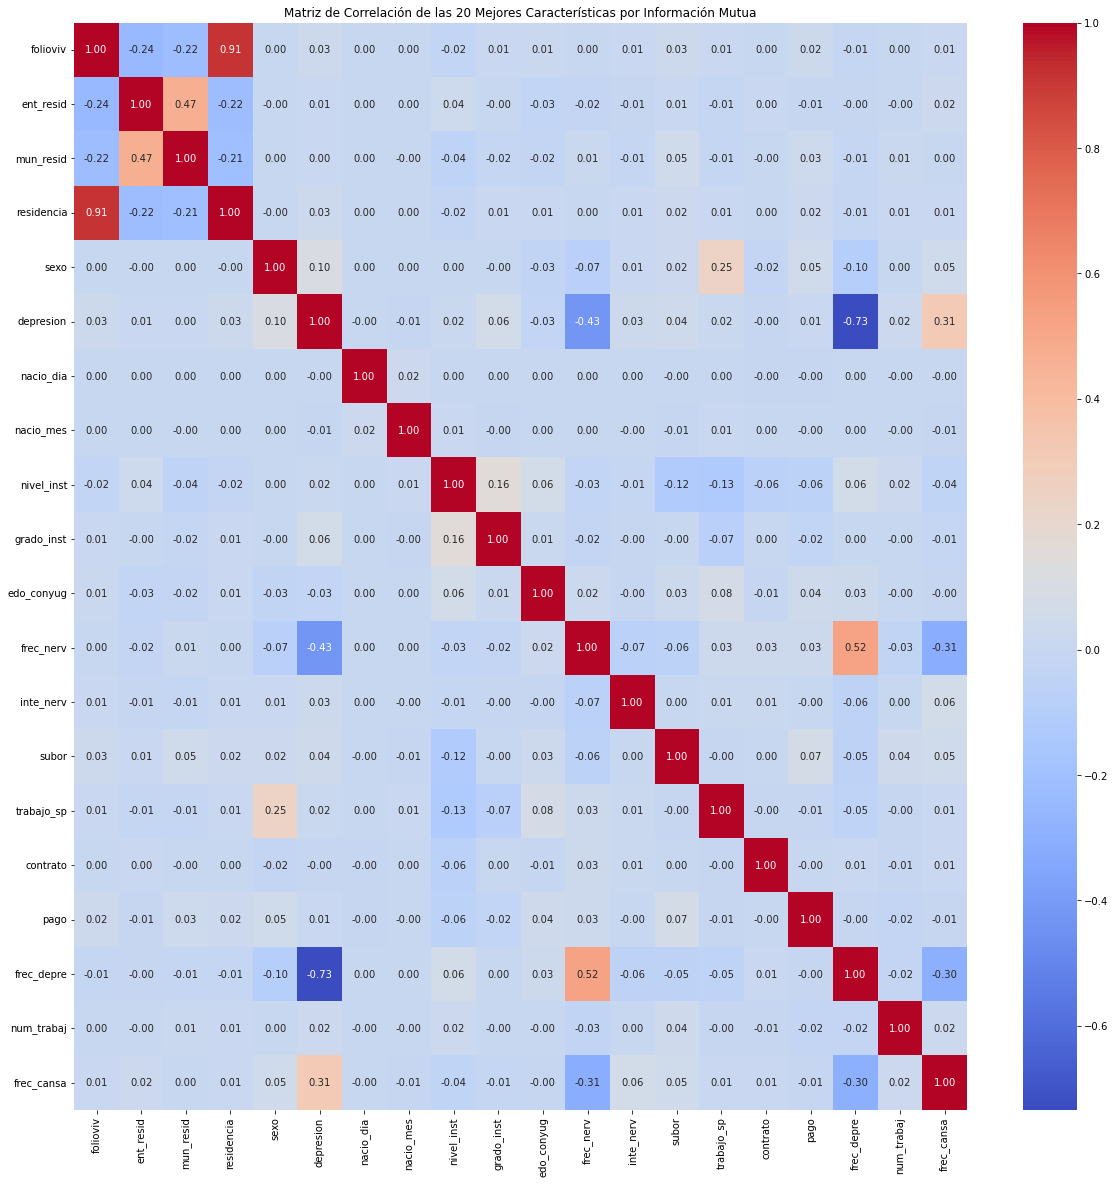

In [39]:
#correlacion de Informacion Mutua
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Suponiendo que ya tienes tus datos X e y
# X: DataFrame de características
# y: Serie o DataFrame de la variable objetivo

# Calcular la información mutua
mi_scores = mutual_info_regression(X_scaled, y_scaled)

# Crear un DataFrame con los nombres de las columnas y sus valores de información mutua
df_mi = pd.DataFrame({
    'Column_Names': X1.columns,  # Asegúrate de usar las columnas de X
    'Mutual_Information': mi_scores
})

# Ordenar el DataFrame por la información mutua en orden descendente
df_mi.sort_values(by='Mutual_Information', ascending=False, inplace=True)

# Seleccionar las 20 mejores características
top_20_features = df_mi.head(20)['Column_Names'].tolist()

# Convertir X_scaled a un DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Imprimir para depuración
print("Columnas en X_scaled_df:", X_scaled_df.columns)
print("Características seleccionadas:", top_20_features)

# Verificar que todas las características existen en X_scaled_df
top_20_features = [feature for feature in top_20_features if feature in X_scaled_df.columns]

print("Características válidas después de la verificación:", top_20_features)

# Calcular la matriz de correlación para las 20 mejores características
corr_matrix = X_scaled_df[top_20_features].corr()

# Mostrar un mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de las 20 Mejores Características por Información Mutua')
plt.show()


In [40]:
df_combined.sort_values('Mutual_Information', ascending=False,  inplace = True)
df_efs_best_20 = df_mi.iloc[:20]
df_efs_best_20

,Column_Names,Mutual_Information
0,folioviv,0.544255
69,ent_resid,0.268317
70,mun_resid,0.253607
17,residencia,0.248642
6,sexo,0.055186
71,depresion,0.046099
4,nacio_dia,0.038082
5,nacio_mes,0.036604
16,nivel_inst,0.032946
15,grado_inst,0.032490


# CasualNex

In [41]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

In [42]:
import itertools
import networkx as nx
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

# Ejemplo de listas para el caso de prueba
columnas_seleccionadas = df_efs_best_20['Column_Names'].tolist()
#columnas_seleccionadas.append('sexo')
# Generar combinaciones de cada columna en best_10 con la columna de y
combinaciones = [(col, 'suicidio') for col in columnas_seleccionadas]

# Mostrar las combinaciones almacenadas en la variable
print(combinaciones)

# Crear el modelo estructural
sm = StructureModel()

# Agregar bordes al modelo estructural basados en las combinaciones
sm.add_edges_from(combinaciones)

# Mostrar los bordes del modelo estructural
print(sm.edges)

[('folioviv', 'suicidio'), ('ent_resid', 'suicidio'), ('mun_resid', 'suicidio'), ('residencia', 'suicidio'), ('sexo', 'suicidio'), ('depresion', 'suicidio'), ('nacio_dia', 'suicidio'), ('nacio_mes', 'suicidio'), ('nivel_inst', 'suicidio'), ('grado_inst', 'suicidio'), ('edo_conyug', 'suicidio'), ('frec_nerv', 'suicidio'), ('inte_nerv', 'suicidio'), ('subor', 'suicidio'), ('trabajo_sp', 'suicidio'), ('contrato', 'suicidio'), ('pago', 'suicidio'), ('frec_depre', 'suicidio'), ('num_trabaj', 'suicidio'), ('frec_cansa', 'suicidio')]
[('folioviv', 'suicidio'), ('ent_resid', 'suicidio'), ('mun_resid', 'suicidio'), ('residencia', 'suicidio'), ('sexo', 'suicidio'), ('depresion', 'suicidio'), ('nacio_dia', 'suicidio'), ('nacio_mes', 'suicidio'), ('nivel_inst', 'suicidio'), ('grado_inst', 'suicidio'), ('edo_conyug', 'suicidio'), ('frec_nerv', 'suicidio'), ('inte_nerv', 'suicidio'), ('subor', 'suicidio'), ('trabajo_sp', 'suicidio'), ('contrato', 'suicidio'), ('pago', 'suicidio'), ('frec_depre', 'su

In [43]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.show("supporting_files/01_simple_plot.html")

supporting_files/01_simple_plot.html


In [44]:
# Opcional: combinar X y y escalados en un solo DataFrame
df_X_scaled_c = df_X_scaled[columnas_seleccionadas]
df_combined_scaled = pd.concat([df_X_scaled_c, df_y_scaled], axis=1)

In [45]:
best_10 = pd.Series(columnas_seleccionadas)
best_10

0       folioviv
1      ent_resid
2      mun_resid
3     residencia
4           sexo
5      depresion
6      nacio_dia
7      nacio_mes
8     nivel_inst
9     grado_inst
10    edo_conyug
11     frec_nerv
12     inte_nerv
13         subor
14    trabajo_sp
15      contrato
16          pago
17    frec_depre
18    num_trabaj
19    frec_cansa
dtype: object

In [46]:
# Create a DataFrame for the new entry
new_entry = pd.DataFrame({'Column_Names': ['suicidio']})

# Concatenate best_10 with the new entry DataFrame
best_10 = pd.concat([best_10, new_entry['Column_Names']], ignore_index=True)

#print(best_10)

# Seleccionar las columnas en el DataFrame
data_seleccionada = df_combined_scaled

# Mostrar las primeras filas del DataFrame resultante para verificar
data_seleccionada.head()

,folioviv,ent_resid,mun_resid,residencia,sexo,depresion,nacio_dia,nacio_mes,nivel_inst,grado_inst,...,frec_nerv,inte_nerv,subor,trabajo_sp,contrato,pago,frec_depre,num_trabaj,frec_cansa,suicidios
0,0.000000e+00,0.0,0.0091,0.000000,0.0,1.0,0.500000,1.000000,0.416667,0.500000,...,0.375000,0.000000,0.292832,1.000000,0.096037,0.046308,0.125000,0.039482,0.125000,0.0
1,0.000000e+00,0.0,0.0091,0.000000,0.0,1.0,0.966667,0.545455,0.833333,0.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.125000,0.0
2,0.000000e+00,0.0,0.0091,0.000000,1.0,1.0,0.233333,0.727273,0.250000,0.500000,...,0.125000,0.000000,0.292832,1.000000,0.096037,0.046308,0.125000,0.039482,0.125000,0.0
3,0.000000e+00,0.0,0.0091,0.478125,1.0,0.0,0.066667,0.727273,0.000000,0.000000,...,0.382609,0.071323,0.292832,0.405944,0.096037,0.046308,0.440621,0.039482,0.050236,0.0
4,7.593185e-09,0.0,0.0091,0.000000,0.0,0.0,0.633333,0.363636,0.916667,0.333333,...,0.500000,0.071323,1.000000,0.000000,0.096037,0.046308,0.500000,0.000000,0.000000,0.0


In [ ]:
len(data_seleccionada)

In [47]:
dataset = data_seleccionada#.sample(n=100000)  # Obtener una muestra aleatoria de 50000 filas
len(dataset)

221528

In [48]:
import time
from causalnex.structure.notears import from_pandas

# Iniciar el temporizador
start_time = time.time()

# Cargar el modelo
sm = from_pandas(dataset)
sm2 = sm

# Detener el temporizador
end_time = time.time()

# Calcular el tiempo transcurrido
elapsed_time = end_time - start_time

print(f"El tiempo de carga del modelo fue de {elapsed_time:.2f} segundos")


El tiempo de carga del modelo fue de 419.83 segundos


In [49]:
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

viz.toggle_physics(False)
viz.show("supporting_files/01_fully_connected.html")

supporting_files/01_fully_connected.html


In [50]:
sm = sm2
sm.remove_edges_below_threshold(0.65)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.show("supporting_files/01_thresholded.html")


supporting_files/01_thresholded.html


In [52]:
sm = sm2
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
viz.show("supporting_files/01_thresholded2.html")

supporting_files/01_thresholded2.html


In [ ]:
import itertools
import networkx as nx
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.structure.notears import from_pandas
from causalnex.network import BayesianNetwork
from causalnex.estimator import MarginalClassificationEstimator

# Supongamos que df_efs_best_20 es tu DataFrame y 'Column_Names' es la columna con los nombres de las características
# df_efs_best_20 = pd.read_csv('tu_archivo.csv')  # Asegúrate de cargar tu DataFrame aquí

# Ejemplo de listas para el caso de prueba
#columnas_seleccionadas = df_efs_best_20['Column_Names'].tolist()

# Generar combinaciones de cada columna en best_10 con la columna de y (suicidio)
combinaciones = [(col, 'suicidio') for col in columnas_seleccionadas]

# Mostrar las combinaciones almacenadas en la variable
print(combinaciones)

# Crear el modelo estructural
sm = StructureModel()

# Agregar bordes al modelo estructural basados en las combinaciones
sm.add_edges_from(combinaciones)

# Mostrar los bordes del modelo estructural
print(sm.edges)

# Crear una red bayesiana a partir del modelo estructural
bn = BayesianNetwork(sm)

# Entrenar la red bayesiana utilizando el estimador marginal
estimator = MarginalClassificationEstimator(bn)
estimator.fit(data_seleccionada)

# Realizar la inferencia
# Supongamos que tienes un diccionario de evidencia
evidencia = {'sexo': 1}  # Reemplaza con tus datos
inferencia = bn.do_inference(evidence=evidencia)
print(inferencia)

# Visualizar la estructura
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

viz.toggle_physics(False)
viz.show("supporting_files/01_fully_connected.html")
